# Universal Approximation Theorem in Action
The code below use a single layer ANN to approximate a sinewave.

## Statement of Proof for Sinewave
Let $ C(X,\mathbb{R})$ denote the set of continuous functions from a subset  $X$ of a Euclidean  $\mathbb{R} $space to a Euclidean space  $\mathbb{R}^.$ 
Let $\sigma$ be any continuous sigmoidal function. Then the finite sums of the form: 

$$G(\vec{x})=\Sigma_{j=1}^N \alpha_j\sigma(w_j\cdot x+b_j),$$

are dense in $C([0,1]^n)$. In other words, given any $f\in C([0,1]^n)$ and $\epsilon >0$, there is a sum $G(\vec{x})$ of the above form, for which: 

$$|G(x)-sin(x) |<\epsilon,$$

for all $x$.		


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (sine wave)
x = np.linspace(0, 2 * np.pi, 100)  # Input values
y = np.sin(x)  # Target sine wave

# Convert data to PyTorch tensors
x_tensor = torch.FloatTensor(x).unsqueeze(1)  # Reshape to (100, 1)
y_tensor = torch.FloatTensor(y).unsqueeze(1)

    
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self,n_hidden=3):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, n_hidden)  # Input: 1, Hidden: ?
        self.fc2 = nn.Linear(n_hidden, 1)  # Hidden: ?, Output: 1

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model, loss function, and optimizer
model = SimpleNN(3)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model

SimpleNN(
  (fc1): Linear(in_features=1, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
)

### Three Node Network

Epoch [100/2000], Loss: 0.3426
Epoch [200/2000], Loss: 0.1683
Epoch [300/2000], Loss: 0.1272
Epoch [400/2000], Loss: 0.1102
Epoch [500/2000], Loss: 0.0854
Epoch [600/2000], Loss: 0.0562


Epoch [700/2000], Loss: 0.0424
Epoch [800/2000], Loss: 0.0384
Epoch [900/2000], Loss: 0.0369
Epoch [1000/2000], Loss: 0.0356
Epoch [1100/2000], Loss: 0.0341
Epoch [1200/2000], Loss: 0.0321


Epoch [1300/2000], Loss: 0.0294
Epoch [1400/2000], Loss: 0.0260
Epoch [1500/2000], Loss: 0.0218
Epoch [1600/2000], Loss: 0.0173
Epoch [1700/2000], Loss: 0.0130
Epoch [1800/2000], Loss: 0.0096
Epoch [1900/2000], Loss: 0.0071


Epoch [2000/2000], Loss: 0.0055


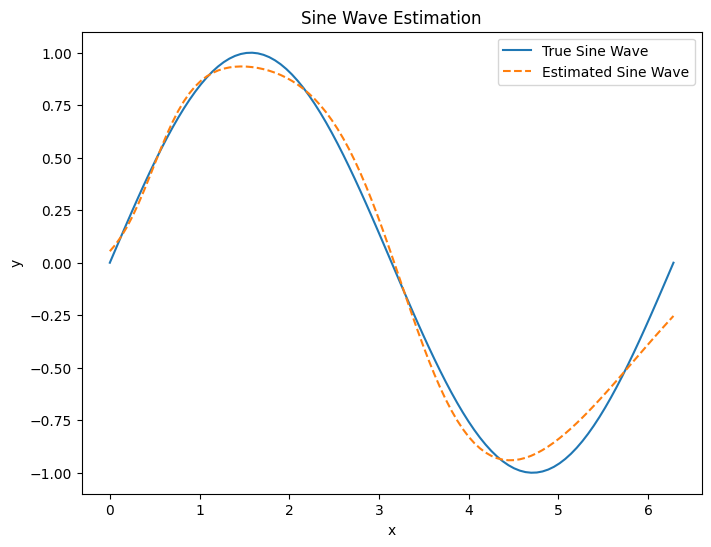

In [2]:
EPOCH=[]
EPOCH_LOSS=[]
# Training the model
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    
    # Compute loss
    loss = criterion(outputs, y_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
        EPOCH.append(epoch)
        EPOCH_LOSS.append(loss.item())

# Plot the estimated sine wave
model.eval()  # Switch to evaluation mode
with torch.no_grad():
    predicted = model(x_tensor).numpy()

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='True Sine Wave')
plt.plot(x, predicted, label='Estimated Sine Wave', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Wave Estimation')
plt.show()

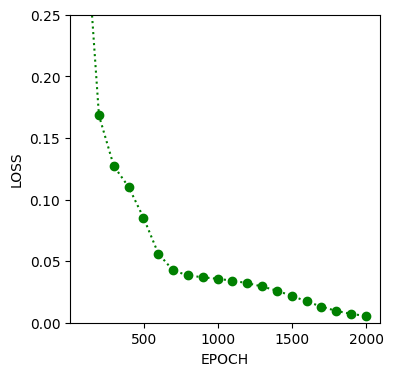

In [3]:
plt.figure(figsize=(4, 4))
plt.plot(EPOCH,EPOCH_LOSS,':og')
plt.ylim((0,0.25))
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.show()

Node [1], Epoch [1000/2000], Loss: 0.4956


Node [1], Epoch [2000/2000], Loss: 0.4933


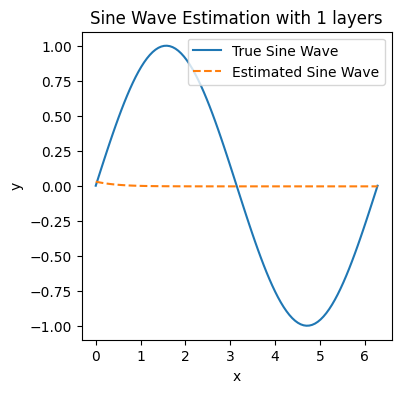

Node [2], Epoch [1000/2000], Loss: 0.0387


Node [2], Epoch [2000/2000], Loss: 0.0368


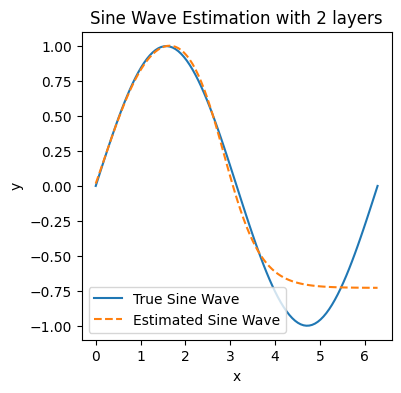

Node [3], Epoch [1000/2000], Loss: 0.0414


Node [3], Epoch [2000/2000], Loss: 0.0368


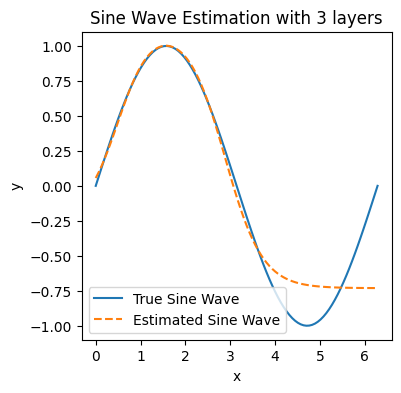

Node [4], Epoch [1000/2000], Loss: 0.0395


Node [4], Epoch [2000/2000], Loss: 0.0027


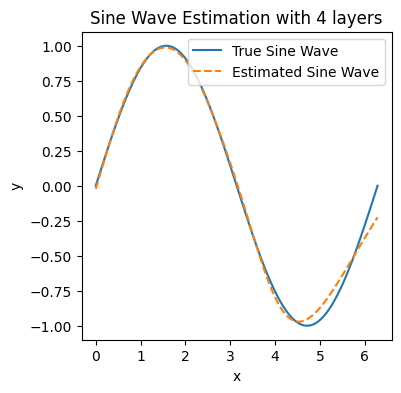

Node [5], Epoch [1000/2000], Loss: 0.0098


Node [5], Epoch [2000/2000], Loss: 0.0001


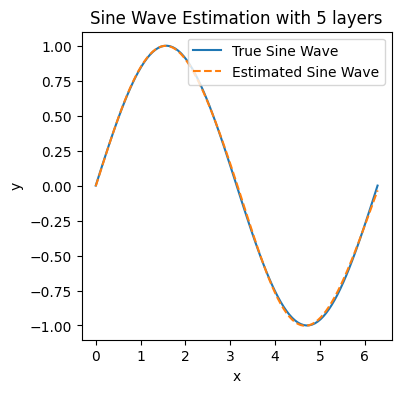

Node [6], Epoch [1000/2000], Loss: 0.0096


Node [6], Epoch [2000/2000], Loss: 0.0004


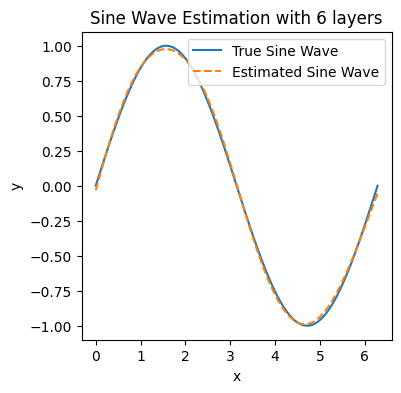

Node [7], Epoch [1000/2000], Loss: 0.0005


Node [7], Epoch [2000/2000], Loss: 0.0000


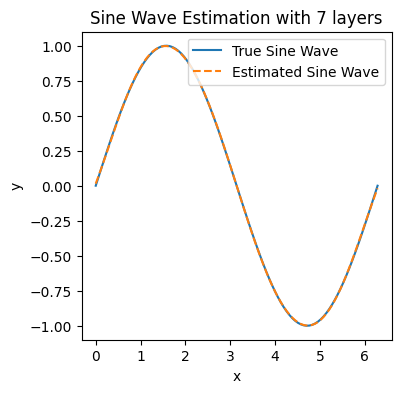

Node [8], Epoch [1000/2000], Loss: 0.0010


Node [8], Epoch [2000/2000], Loss: 0.0000


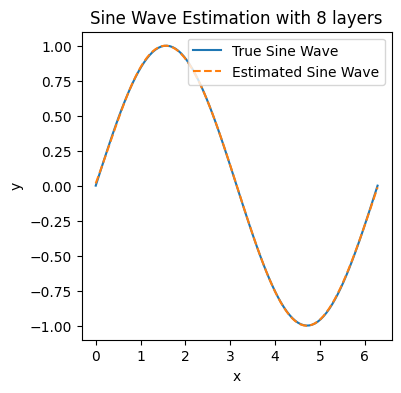

In [4]:
LOSS=[]
for n in range(1,9,1):
    model = SimpleNN(n)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    # Training the model
    num_epochs = 2000

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(x_tensor)

        # Compute loss
        loss = criterion(outputs, y_tensor)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 1000 == 0:
            print(f'Node [{n}], Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    LOSS.append(loss.item())
        # Plot the estimated sine wave
    model.eval()  # Switch to evaluation mode
    with torch.no_grad():
        predicted = model(x_tensor).numpy()

    plt.figure(figsize=(4, 4))
    plt.plot(x, y, label='True Sine Wave')
    plt.plot(x, predicted, label='Estimated Sine Wave', linestyle='--')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sine Wave Estimation with '+str(n)+' layers')
    plt.show()

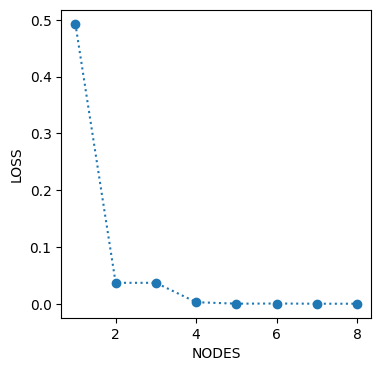

In [5]:
plt.figure(figsize=(4, 4))
plt.plot(np.arange(1,9),LOSS,':o')

plt.xlabel('NODES')
plt.ylabel('LOSS')
plt.show()

### Ten Node Network

Epoch [100/2000], Loss: 0.1778
Epoch [200/2000], Loss: 0.1318
Epoch [300/2000], Loss: 0.0737
Epoch [400/2000], Loss: 0.0473
Epoch [500/2000], Loss: 0.0392
Epoch [600/2000], Loss: 0.0332
Epoch [700/2000], Loss: 0.0270


Epoch [800/2000], Loss: 0.0201
Epoch [900/2000], Loss: 0.0140
Epoch [1000/2000], Loss: 0.0091
Epoch [1100/2000], Loss: 0.0057
Epoch [1200/2000], Loss: 0.0035
Epoch [1300/2000], Loss: 0.0021
Epoch [1400/2000], Loss: 0.0013
Epoch [1500/2000], Loss: 0.0009


Epoch [1600/2000], Loss: 0.0006
Epoch [1700/2000], Loss: 0.0004
Epoch [1800/2000], Loss: 0.0003
Epoch [1900/2000], Loss: 0.0002
Epoch [2000/2000], Loss: 0.0002


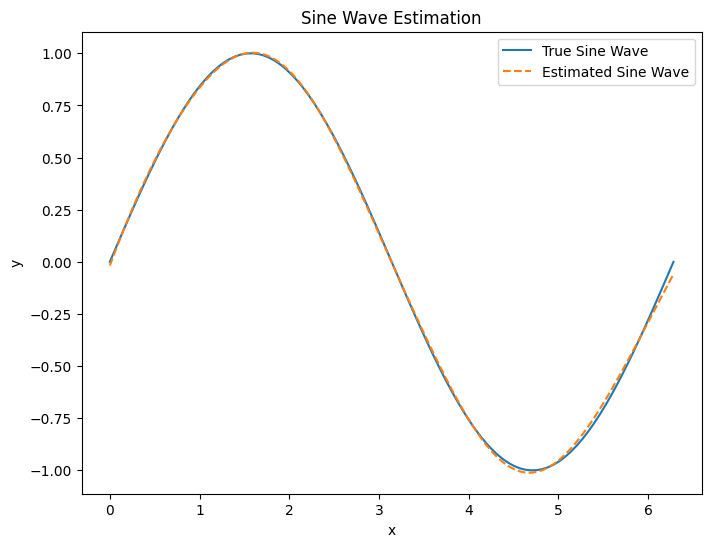

In [6]:
EPOCH10=[]
EPOCH10_LOSS=[]
model = SimpleNN(10)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Training the model
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    
    # Compute loss
    loss = criterion(outputs, y_tensor)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
        EPOCH10.append(epoch)
        EPOCH10_LOSS.append(loss.item())

# Plot the estimated sine wave
model.eval()  # Switch to evaluation mode
with torch.no_grad():
    predicted = model(x_tensor).numpy()

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='True Sine Wave')
plt.plot(x, predicted, label='Estimated Sine Wave', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Wave Estimation')
plt.show()

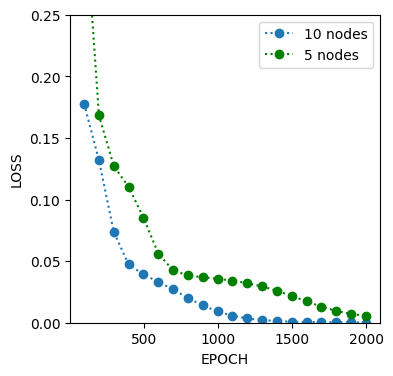

In [7]:
plt.figure(figsize=(4, 4))
plt.plot(EPOCH10,EPOCH10_LOSS,':o',label='10 nodes')
plt.plot(EPOCH,EPOCH_LOSS,':og',label='5 nodes')
plt.ylim((0,0.25))
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()